## Instruction
- Use this template to develop your project. Do not change the steps. 
- For each step, you may add additional cells if needed.
- Describe the steps in the "Description:" field.

## Group Information

Group No: Cancer_2

- Member 1: Foo Ling Zhen
- Member 2: Dean Lau Sheng Ting
- Member 3: Looi Wei En
- Member 4: Eason Peng 


## Import libraries

In [875]:
%config Completer.use_jedi=False

import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.utils import resample, shuffle
from sklearn.preprocessing import MinMaxScaler, StandardScaler


## Load the dataset

In [796]:
df= pd.read_csv('risk_factors.csv')
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,0,0


In [797]:
df.shape

(858, 36)

In [798]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [799]:
df.isna().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


The dataframe has 858 entries and 36 columns, consisting of datatypes int64 and object. There no null values detected in the dataframe.

Out of 4 target columns - Hinselmann, Schiller, Cytology and Biopsy, the target 

In [800]:
# Assigning features to X
X = df.drop('Biopsy', axis = 1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 35 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [801]:
X.shape


(858, 35)

In [802]:
# Assigning column 'Biopsy' as the target, y
y = df['Biopsy']
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 858 entries, 0 to 857
Series name: Biopsy
Non-Null Count  Dtype
--------------  -----
858 non-null    int64
dtypes: int64(1)
memory usage: 6.8 KB


In [803]:
y.shape

(858,)

## Split the dataset
Split the dataset into training, validation and test sets.

In [804]:
#split into 80:10:10

#splitting into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1,random_state=0)

#splitting training and validation set 
X_train, X_vald, y_train, y_vald = train_test_split(X, y, test_size = 0.1,random_state=0)


In [805]:
print(X_train.shape)
print(X_vald.shape)
print(X_test.shape)

(772, 35)
(86, 35)
(86, 35)


In [806]:
print(y_train.shape)
print(y_vald.shape)
print(y_test.shape)

(772,)
(86,)
(86,)


## Data preprocessing
Perform data preprocessing such as normalization, standardization, label encoding etc.
______________________________________________________________________________________
Description:
In this data preprocessing operation, we perform the following in order:
1. Missing Value Detection and Replacement
2. Outlier Detection
3. Deal with Imbalanced Data
4. Data Normalization
5. Data Standardization

### Missing Value Detection and Replacement

In [807]:
# Show the datatypes of each column
X_train.dtypes

Age                                    int64
Number of sexual partners             object
First sexual intercourse              object
Num of pregnancies                    object
Smokes                                object
Smokes (years)                        object
Smokes (packs/year)                   object
Hormonal Contraceptives               object
Hormonal Contraceptives (years)       object
IUD                                   object
IUD (years)                           object
STDs                                  object
STDs (number)                         object
STDs:condylomatosis                   object
STDs:cervical condylomatosis          object
STDs:vaginal condylomatosis           object
STDs:vulvo-perineal condylomatosis    object
STDs:syphilis                         object
STDs:pelvic inflammatory disease      object
STDs:genital herpes                   object
STDs:molluscum contagiosum            object
STDs:AIDS                             object
STDs:HIV  

In [808]:
# Show the columns where datatype = 'object'
X_train.select_dtypes(include='object').head(10)

,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),...,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Time since first diagnosis,STDs: Time since last diagnosis
301,?,16.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,?,?
789,1.0,18.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
452,1.0,16.0,1.0,0.0,0.0,0.0,?,?,?,?,...,?,?,?,?,?,?,?,?,?,?
344,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,?,?
650,2.0,17.0,?,1.0,10.0,1.0,1.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,?,?
524,1.0,17.0,3.0,0.0,0.0,0.0,1.0,0.16,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,?,?
215,1.0,24.0,1.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,?,?
620,3.0,18.0,2.0,1.0,5.0,0.5132021277,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,?,?
142,3.0,12.0,3.0,1.0,16.0,12.0,?,?,?,?,...,?,?,?,?,?,?,?,?,?,?
141,3.0,18.0,1.0,0.0,0.0,0.0,?,?,?,?,...,?,?,?,?,?,?,?,?,?,?


We can observe that 26 columns have datatype 'object' although they consist mostly of floating point numbers. We can also see that some fields are filled with '?'. Thus, we can infer that the character '?' contributed to the heterogeneous data that resulted in the datatype 'object', and that '?' is used to represent missing values.

In [809]:
# Count the number of missing values in the columns
X_train[X_train == '?'].count()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     51
Smokes                                 12
Smokes (years)                         12
Smokes (packs/year)                    12
Hormonal Contraceptives                98
Hormonal Contraceptives (years)        98
IUD                                   104
IUD (years)                           104
STDs                                   94
STDs (number)                          94
STDs:condylomatosis                    94
STDs:cervical condylomatosis           94
STDs:vaginal condylomatosis            94
STDs:vulvo-perineal condylomatosis     94
STDs:syphilis                          94
STDs:pelvic inflammatory disease       94
STDs:genital herpes                    94
STDs:molluscum contagiosum             94
STDs:AIDS                              94
STDs:HIV                               94
STDs:Hepatitis B                  

In [810]:
# Replace '?' in the columns with nan
X_train_nan = X_train.copy()
X_train_nan.replace('?', np.nan, inplace=True)

# Create an instance of SimpleImputer with mean as the strategy
mean_imputer = SimpleImputer(strategy='mean')

# Fill in the nan values with the mean of their column values
X_train_imputed = pd.DataFrame(mean_imputer.fit_transform(X_train_nan), columns=X_train.columns)


In [811]:
# Check for null values
X_train_imputed.isna().all()

Age                                   False
Number of sexual partners             False
First sexual intercourse              False
Num of pregnancies                    False
Smokes                                False
Smokes (years)                        False
Smokes (packs/year)                   False
Hormonal Contraceptives               False
Hormonal Contraceptives (years)       False
IUD                                   False
IUD (years)                           False
STDs                                  False
STDs (number)                         False
STDs:condylomatosis                   False
STDs:cervical condylomatosis          False
STDs:vaginal condylomatosis           False
STDs:vulvo-perineal condylomatosis    False
STDs:syphilis                         False
STDs:pelvic inflammatory disease      False
STDs:genital herpes                   False
STDs:molluscum contagiosum            False
STDs:AIDS                             False
STDs:HIV                        

In [812]:
# Check if any '?' remains in the columns
X_train_imputed[X_train_imputed=='?'].count()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [813]:
# Check if columns still consist of datatype = 'object'
X_train_imputed.dtypes

Age                                   float64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                float64
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives               float64
Hormonal Contraceptives (years)       float64
IUD                                   float64
IUD (years)                           float64
STDs                                  float64
STDs (number)                         float64
STDs:condylomatosis                   float64
STDs:cervical condylomatosis          float64
STDs:vaginal condylomatosis           float64
STDs:vulvo-perineal condylomatosis    float64
STDs:syphilis                         float64
STDs:pelvic inflammatory disease      float64
STDs:genital herpes                   float64
STDs:molluscum contagiosum            float64
STDs:AIDS                         

In [814]:
X_train_imputed


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,20.0,2.540214,16.0,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,6.151515,5.80303,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20.0,1.000000,18.0,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,1.0,1.000000,1.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,17.0,1.000000,16.0,1.000000,0.0,0.0,0.0,0.642433,2.248609,0.106287,...,0.0,6.151515,5.80303,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,18.0,1.000000,17.0,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,6.151515,5.80303,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,26.0,2.000000,17.0,2.245492,1.0,10.0,1.0,1.000000,3.000000,0.000000,...,0.0,6.151515,5.80303,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,24.0,1.000000,14.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,6.151515,5.80303,0.0,0.0,0.0,0.0,0.0,0.0,0.0
768,27.0,2.000000,17.0,4.000000,0.0,0.0,0.0,1.000000,2.000000,0.000000,...,0.0,6.151515,5.80303,0.0,0.0,0.0,0.0,0.0,0.0,0.0
769,24.0,1.000000,17.0,3.000000,0.0,0.0,0.0,1.000000,6.000000,0.000000,...,0.0,6.151515,5.80303,0.0,0.0,0.0,0.0,0.0,0.0,0.0
770,20.0,1.000000,16.0,2.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,6.151515,5.80303,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Repeat the steps separately for validation set and test set.

In [815]:
### Validation set

# Replace '?' in the columns with nan
X_vald_nan = X_vald.copy()
X_vald_nan.replace('?', np.nan, inplace=True)

# Fill in the nan values with the mean of their column values
X_vald_imputed = pd.DataFrame(mean_imputer.fit_transform(X_vald_nan), columns=X_vald.columns)

# Check for null values
print(X_vald_imputed.isna().all())

Age                                   False
Number of sexual partners             False
First sexual intercourse              False
Num of pregnancies                    False
Smokes                                False
Smokes (years)                        False
Smokes (packs/year)                   False
Hormonal Contraceptives               False
Hormonal Contraceptives (years)       False
IUD                                   False
IUD (years)                           False
STDs                                  False
STDs (number)                         False
STDs:condylomatosis                   False
STDs:cervical condylomatosis          False
STDs:vaginal condylomatosis           False
STDs:vulvo-perineal condylomatosis    False
STDs:syphilis                         False
STDs:pelvic inflammatory disease      False
STDs:genital herpes                   False
STDs:molluscum contagiosum            False
STDs:AIDS                             False
STDs:HIV                        

In [816]:
### Validation Set

# Check if any '?' remains in the columns
print(X_vald_imputed[X_vald_imputed=='?'].count())

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [817]:
### Test set

# Replace '?' in the columns with nan
X_test_nan = X_test.copy()
X_test_nan.replace('?', np.nan, inplace=True)

# Fill in the nan values with the mean of their column values
X_test_imputed = pd.DataFrame(mean_imputer.fit_transform(X_test_nan), columns=X_vald.columns)

# Check for null values
print(X_test_imputed.isna().all())

Age                                   False
Number of sexual partners             False
First sexual intercourse              False
Num of pregnancies                    False
Smokes                                False
Smokes (years)                        False
Smokes (packs/year)                   False
Hormonal Contraceptives               False
Hormonal Contraceptives (years)       False
IUD                                   False
IUD (years)                           False
STDs                                  False
STDs (number)                         False
STDs:condylomatosis                   False
STDs:cervical condylomatosis          False
STDs:vaginal condylomatosis           False
STDs:vulvo-perineal condylomatosis    False
STDs:syphilis                         False
STDs:pelvic inflammatory disease      False
STDs:genital herpes                   False
STDs:molluscum contagiosum            False
STDs:AIDS                             False
STDs:HIV                        

In [818]:
### Test Set

# Check if any '?' remains in the columns
print(X_test_imputed[X_test_imputed=='?'].count())

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


### Outlier Detection


#### Training set

In [819]:
X_train_imputed.iloc[:,0:18].describe(include = 'all')

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis
count,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.0,772.000000,772.000000,772.000000
mean,26.769430,2.540214,16.963399,2.245492,0.151316,1.253155,0.480533,0.642433,2.248609,0.106287,0.494222,0.107670,0.178466,0.058997,0.0,0.005900,0.057522,0.023599
std,8.315672,1.678928,2.819925,1.362623,0.355791,4.043737,2.303233,0.448121,3.414818,0.286880,1.808630,0.290668,0.523638,0.220952,0.0,0.071815,0.218344,0.142347
min,14.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,25.500000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.248609,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,79.000000,28.000000,32.000000,10.000000,1.000000,37.000000,37.000000,1.000000,22.000000,1.000000,19.000000,1.000000,4.000000,1.000000,0.0,1.000000,1.000000,1.000000


In [820]:
X_train_imputed.iloc[:,18:].describe(include = 'all')

,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
count,772.000000,772.000000,772.000000,772.0,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000
mean,0.001475,0.001475,0.001475,0.0,0.023599,0.001475,0.002950,0.090674,6.151515,5.803030,0.022021,0.010363,0.022021,0.028497,0.042746,0.088083,0.046632
std,0.035988,0.035988,0.035988,0.0,0.142347,0.035988,0.050856,0.309078,1.757875,1.715285,0.146846,0.101334,0.146846,0.166497,0.202415,0.283599,0.210986
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,6.151515,5.803030,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,6.151515,5.803030,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,6.151515,5.803030,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,3.000000,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can infer that there are outliers present in some columns by monitoring the standard deviation and difference between the max value and the mean value.

The identified columns with outliers are:
- Column[1]: Number of Sexual Partners
- Column[3]: Num of pregnancies
- Column[5]: Smokes (years)
- Column[6]: Smokes (packs/year)
- Column[8]: Hormonal Contraceptives (years)
- Column[10]: IUD (years)
- Column[26]: STDs: Time since first diagnosis
- Column[27]: STDs: Time since last diagnosis

Text(0.5, 0.98, 'Box plot and Histogram of Number of sexual partners')

{'whiskers': [<matplotlib.lines.Line2D at 0x25729a68190>,
 'caps': [<matplotlib.lines.Line2D at 0x257171dbf10>,
 'boxes': [<matplotlib.lines.Line2D at 0x25729a684c0>],
 'medians': [<matplotlib.lines.Line2D at 0x257171db370>],
 'fliers': [<matplotlib.lines.Line2D at 0x257171db550>],
 'means': []}

(array([640., 118.,  11.,   1.,   0.,   1.,   0.,   0.,   0.,   1.]),
 array([ 1. ,  3.7,  6.4,  9.1, 11.8, 14.5, 17.2, 19.9, 22.6, 25.3, 28. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of Num of pregnancies')

{'whiskers': [<matplotlib.lines.Line2D at 0x2572aeec130>,
 'caps': [<matplotlib.lines.Line2D at 0x25725440df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2572aeecac0>],
 'medians': [<matplotlib.lines.Line2D at 0x257254401f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25725440ca0>],
 'means': []}

(array([ 14., 251., 261., 126.,  66.,  30.,  17.,   4.,   2.,   1.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of Smokes (years)')

{'whiskers': [<matplotlib.lines.Line2D at 0x2572c373640>,
 'caps': [<matplotlib.lines.Line2D at 0x2572c373520>,
 'boxes': [<matplotlib.lines.Line2D at 0x2572c373bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x2572c3735b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x257296cd4c0>],
 'means': []}

(array([695.,  22.,  24.,  10.,  11.,   7.,   0.,   0.,   1.,   2.]),
 array([ 0. ,  3.7,  7.4, 11.1, 14.8, 18.5, 22.2, 25.9, 29.6, 33.3, 37. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of Smokes (packs/year)')

{'whiskers': [<matplotlib.lines.Line2D at 0x2572bffab80>,
 'caps': [<matplotlib.lines.Line2D at 0x2572cad6a30>,
 'boxes': [<matplotlib.lines.Line2D at 0x2572bfef220>],
 'medians': [<matplotlib.lines.Line2D at 0x2572dff5f70>],
 'fliers': [<matplotlib.lines.Line2D at 0x2572ac40eb0>],
 'means': []}

(array([746.,  12.,   6.,   3.,   1.,   3.,   0.,   0.,   0.,   1.]),
 array([ 0. ,  3.7,  7.4, 11.1, 14.8, 18.5, 22.2, 25.9, 29.6, 33.3, 37. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of Hormonal Contraceptives (years)')

{'whiskers': [<matplotlib.lines.Line2D at 0x2572ad40790>,
 'caps': [<matplotlib.lines.Line2D at 0x2572c01edc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2572ad40070>],
 'medians': [<matplotlib.lines.Line2D at 0x2572a8ff100>],
 'fliers': [<matplotlib.lines.Line2D at 0x257240e5340>],
 'means': []}

(array([482., 152.,  55.,  38.,  21.,   8.,   7.,   3.,   1.,   5.]),
 array([ 0. ,  2.2,  4.4,  6.6,  8.8, 11. , 13.2, 15.4, 17.6, 19.8, 22. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of IUD (years)')

{'whiskers': [<matplotlib.lines.Line2D at 0x2572e095e50>,
 'caps': [<matplotlib.lines.Line2D at 0x2572ab35e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x2572c8e94c0>],
 'medians': [<matplotlib.lines.Line2D at 0x2572ab35670>],
 'fliers': [<matplotlib.lines.Line2D at 0x25722f44310>],
 'means': []}

(array([719.,  18.,  11.,  10.,   6.,   4.,   1.,   1.,   1.,   1.]),
 array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of STDs: Time since first diagnosis')

{'whiskers': [<matplotlib.lines.Line2D at 0x2572c83b2b0>,
 'caps': [<matplotlib.lines.Line2D at 0x2572c83ba60>,
 'boxes': [<matplotlib.lines.Line2D at 0x2572c1d3cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x2572c83bd90>],
 'fliers': [<matplotlib.lines.Line2D at 0x2572ae15e80>],
 'means': []}

(array([ 33.,   8., 714.,   3.,   2.,   1.,   1.,   4.,   3.,   3.]),
 array([ 1. ,  3.1,  5.2,  7.3,  9.4, 11.5, 13.6, 15.7, 17.8, 19.9, 22. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of STDs: Time since last diagnosis')

{'whiskers': [<matplotlib.lines.Line2D at 0x2572c15ffd0>,
 'caps': [<matplotlib.lines.Line2D at 0x2572c15fd30>,
 'boxes': [<matplotlib.lines.Line2D at 0x2572c15f340>],
 'medians': [<matplotlib.lines.Line2D at 0x2572c194a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x25730222250>],
 'means': []}

(array([ 35.,   7., 714.,   3.,   2.,   1.,   1.,   4.,   2.,   3.]),
 array([ 1. ,  3.1,  5.2,  7.3,  9.4, 11.5, 13.6, 15.7, 17.8, 19.9, 22. ]),
 <BarContainer object of 10 artists>)

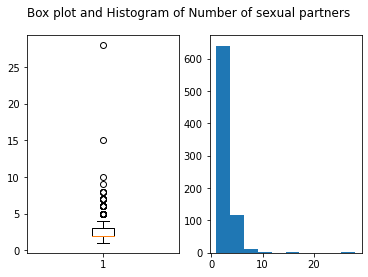

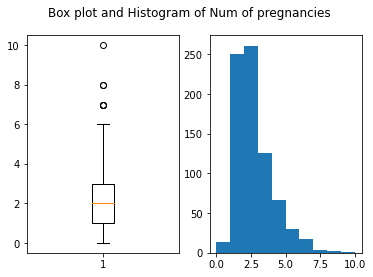

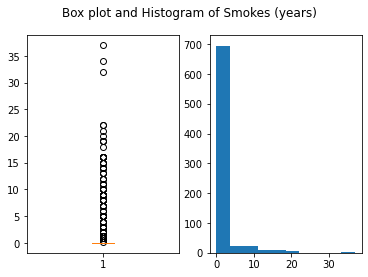

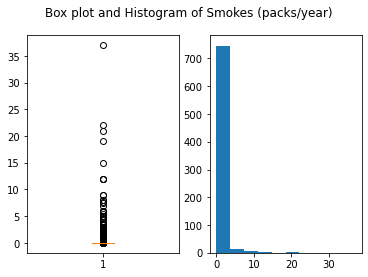

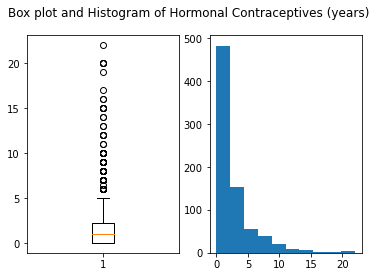

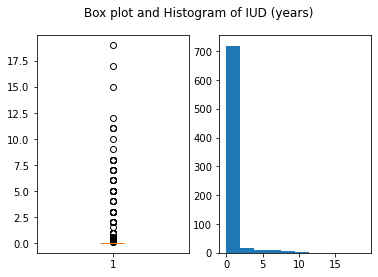

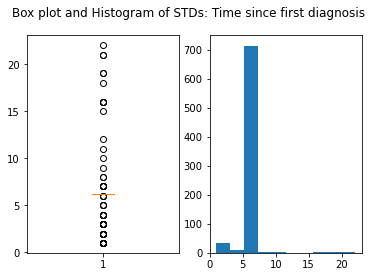

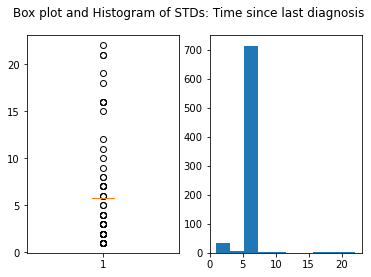

In [821]:
column_train = [1,3,5,6,8,10,26,27]  # Index of identified columns
X_train_outlier = X_train_imputed.copy()

# Plot the distribution of the outlier columns
for num in column_train:
    fig, (boxplot, hist) = plt.subplots(1, 2)
    fig.suptitle('Box plot and Histogram of '+ df.columns[num])
    boxplot.boxplot(X_train_outlier.iloc[:,num:(num+1)])  # Boxplot
    hist.hist(X_train_outlier.iloc[:,num:(num+1)])        # Histogram

From the data visualizations above, we can observe that all the graphs are skewed to the right. Therefore, we will be applying **Square Root transformation** to make the data more normally distributed and reduce the impact of outliers.

In [822]:
# A copy of X_train_outlier where square root transformation will be applied
X_train_sqrt = X_train_outlier.copy()   

# Perform square root transformation on the columns with outliers
X_train_sqrt.iloc[:,column] = np.sqrt(X_train_sqrt.iloc[:,column])
X_train_sqrt

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,20.0,1.593805,16.0,1.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,2.480225,2.408948,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20.0,1.000000,18.0,1.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,1.0,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,17.0,1.000000,16.0,1.000000,0.0,0.000000,0.0,0.642433,1.499536,0.106287,...,0.0,2.480225,2.408948,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,18.0,1.000000,17.0,1.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,2.480225,2.408948,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,26.0,1.414214,17.0,1.498497,1.0,3.162278,1.0,1.000000,1.732051,0.000000,...,0.0,2.480225,2.408948,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,24.0,1.000000,14.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,2.480225,2.408948,0.0,0.0,0.0,0.0,0.0,0.0,0.0
768,27.0,1.414214,17.0,2.000000,0.0,0.000000,0.0,1.000000,1.414214,0.000000,...,0.0,2.480225,2.408948,0.0,0.0,0.0,0.0,0.0,0.0,0.0
769,24.0,1.000000,17.0,1.732051,0.0,0.000000,0.0,1.000000,2.449490,0.000000,...,0.0,2.480225,2.408948,0.0,0.0,0.0,0.0,0.0,0.0,0.0
770,20.0,1.000000,16.0,1.414214,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,2.480225,2.408948,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 0.98, 'Box plot and Histogram of Number of sexual partners')

{'whiskers': [<matplotlib.lines.Line2D at 0x2572ad6cbb0>,
 'caps': [<matplotlib.lines.Line2D at 0x2572ad900d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2572ad6c8e0>],
 'medians': [<matplotlib.lines.Line2D at 0x2572ad90670>],
 'fliers': [<matplotlib.lines.Line2D at 0x2572ad90940>],
 'means': []}

(array([424., 216., 110.,  14.,   5.,   1.,   1.,   0.,   0.,   1.]),
 array([1.        , 1.42915026, 1.85830052, 2.28745079, 2.71660105,
        3.14575131, 3.57490157, 4.00405184, 4.4332021 , 4.86235236,
        5.29150262]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of Num of pregnancies')

{'whiskers': [<matplotlib.lines.Line2D at 0x2572c69cfd0>,
 'caps': [<matplotlib.lines.Line2D at 0x2572a5f9250>,
 'boxes': [<matplotlib.lines.Line2D at 0x2572c69c5b0>],
 'medians': [<matplotlib.lines.Line2D at 0x2572a5f96d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2572a5f9ac0>],
 'means': []}

(array([ 14.,   0.,   0., 251., 261., 126.,  66.,  47.,   6.,   1.]),
 array([0.        , 0.31622777, 0.63245553, 0.9486833 , 1.26491106,
        1.58113883, 1.8973666 , 2.21359436, 2.52982213, 2.84604989,
        3.16227766]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of Smokes (years)')

{'whiskers': [<matplotlib.lines.Line2D at 0x2572e709310>,
 'caps': [<matplotlib.lines.Line2D at 0x2572e7098b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2572e709040>],
 'medians': [<matplotlib.lines.Line2D at 0x2572e709e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x2572e70d850>],
 'means': []}

(array([646.,  35.,  14.,  14.,  23.,  15.,  15.,   7.,   0.,   3.]),
 array([0.        , 0.60827625, 1.21655251, 1.82482876, 2.43310501,
        3.04138127, 3.64965752, 4.25793377, 4.86621002, 5.47448628,
        6.08276253]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of Smokes (packs/year)')

{'whiskers': [<matplotlib.lines.Line2D at 0x2572c70d4f0>,
 'caps': [<matplotlib.lines.Line2D at 0x2572c70da30>,
 'boxes': [<matplotlib.lines.Line2D at 0x2572c70d220>],
 'medians': [<matplotlib.lines.Line2D at 0x2572c70dfd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25730417940>],
 'means': []}

(array([665.,  55.,  23.,  12.,   9.,   3.,   1.,   3.,   0.,   1.]),
 array([0.        , 0.60827625, 1.21655251, 1.82482876, 2.43310501,
        3.04138127, 3.64965752, 4.25793377, 4.86621002, 5.47448628,
        6.08276253]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of Hormonal Contraceptives (years)')

{'whiskers': [<matplotlib.lines.Line2D at 0x25730201700>,
 'caps': [<matplotlib.lines.Line2D at 0x25730201ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25730201430>],
 'medians': [<matplotlib.lines.Line2D at 0x257301e8280>],
 'fliers': [<matplotlib.lines.Line2D at 0x257301e8550>],
 'means': []}

(array([279.,  95.,  74., 168.,  50.,  44.,  38.,  10.,   8.,   6.]),
 array([0.        , 0.46904158, 0.93808315, 1.40712473, 1.8761663 ,
        2.34520788, 2.81424946, 3.28329103, 3.75233261, 4.22137418,
        4.69041576]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of IUD (years)')

{'whiskers': [<matplotlib.lines.Line2D at 0x25731a6da60>,
 'caps': [<matplotlib.lines.Line2D at 0x25731a60040>,
 'boxes': [<matplotlib.lines.Line2D at 0x25731a6d790>],
 'medians': [<matplotlib.lines.Line2D at 0x25731a605e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25731a608b0>],
 'means': []}

(array([601., 109.,   9.,  18.,   4.,  12.,  11.,   5.,   1.,   2.]),
 array([0.        , 0.43588989, 0.87177979, 1.30766968, 1.74355958,
        2.17944947, 2.61533937, 3.05122926, 3.48711915, 3.92300905,
        4.35889894]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of STDs: Time since first diagnosis')

{'whiskers': [<matplotlib.lines.Line2D at 0x25731da8e50>,
 'caps': [<matplotlib.lines.Line2D at 0x25731dc6430>,
 'boxes': [<matplotlib.lines.Line2D at 0x25731da8b80>],
 'medians': [<matplotlib.lines.Line2D at 0x25731dc69d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25731dc6ca0>],
 'means': []}

(array([ 15.,  18.,   5.,   6., 713.,   2.,   2.,   1.,   5.,   5.]),
 array([1.        , 1.36904158, 1.73808315, 2.10712473, 2.4761663 ,
        2.84520788, 3.21424946, 3.58329103, 3.95233261, 4.32137418,
        4.69041576]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of STDs: Time since last diagnosis')

{'whiskers': [<matplotlib.lines.Line2D at 0x2572e9ed130>,
 'caps': [<matplotlib.lines.Line2D at 0x2572e9ed6d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2572e9c7ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x2572e9edac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2572e9edd90>],
 'means': []}

(array([ 17.,  18.,   5., 711.,   7.,   2.,   2.,   1.,   5.,   4.]),
 array([1.        , 1.36904158, 1.73808315, 2.10712473, 2.4761663 ,
        2.84520788, 3.21424946, 3.58329103, 3.95233261, 4.32137418,
        4.69041576]),
 <BarContainer object of 10 artists>)

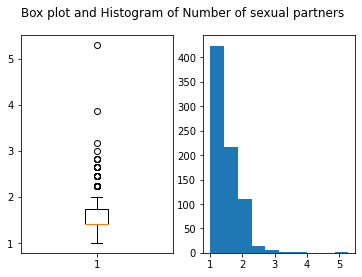

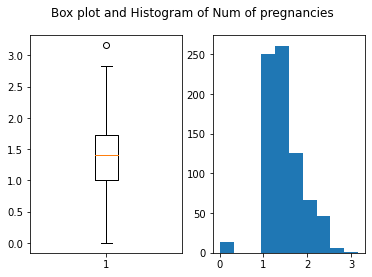

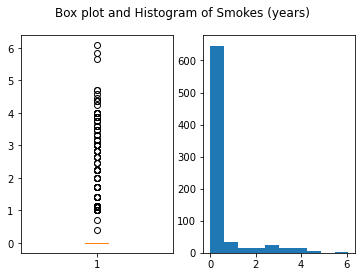

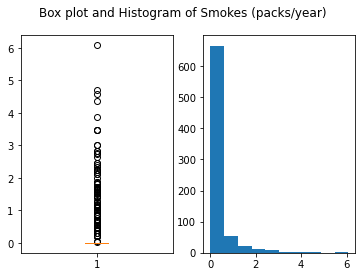

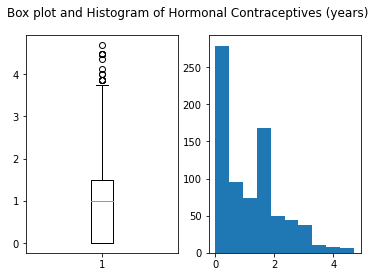

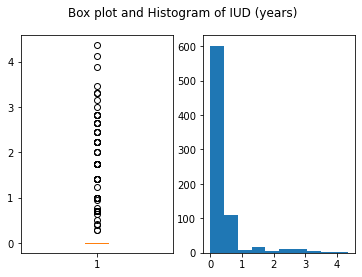

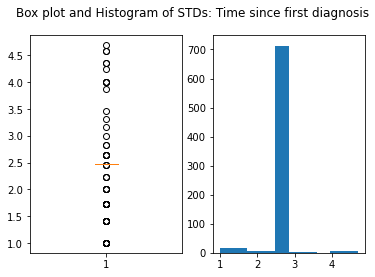

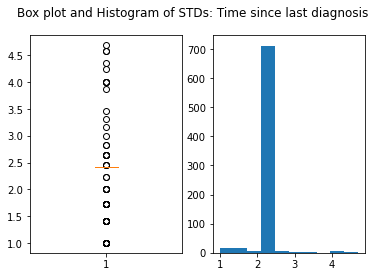

In [823]:
# Plot the distribution of the transformed outlier columns
for num in column_train:
    fig, (boxplot, hist) = plt.subplots(1, 2)
    fig.suptitle('Box plot and Histogram of '+ df.columns[num])
    boxplot.boxplot(X_train_sqrt.iloc[:,num:(num+1)])  # Boxplot
    hist.hist(X_train_sqrt.iloc[:,num:(num+1)])        # Histogram


#### Validation Set

In [824]:
X_vald_imputed.iloc[:,0:18].describe(include = 'all')

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.0,86.0,86.000000,86.000000
mean,27.279070,2.418605,17.279070,2.543210,0.094118,0.920788,0.208252,0.631579,2.325687,0.164384,0.703151,0.080000,0.160000,0.053333,0.0,0.0,0.053333,0.026667
std,10.031305,1.269230,2.523542,1.680682,0.291992,4.195289,1.021208,0.456124,4.368348,0.343467,1.779016,0.254836,0.553917,0.211066,0.0,0.0,0.211066,0.151334
min,13.000000,1.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
25%,21.000000,2.000000,16.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
50%,24.500000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
75%,30.750000,3.000000,18.750000,3.000000,0.000000,0.000000,0.000000,1.000000,2.325687,0.164384,0.703151,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
max,84.000000,7.000000,27.000000,11.000000,1.000000,28.000000,7.000000,1.000000,30.000000,1.000000,8.000000,1.000000,3.000000,1.000000,0.0,0.0,1.000000,1.000000


In [825]:
X_vald_imputed.iloc[:,18:].describe(include = 'all')

,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
count,86.0,86.0,86.0,86.0,86.000000,86.0,86.0,86.00000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,0.0,0.0,0.0,0.0,0.026667,0.0,0.0,0.05814,6.000000,6.000000,0.011628,0.011628,0.011628,0.023256,0.023256,0.069767,0.093023
std,0.0,0.0,0.0,0.0,0.151334,0.0,0.0,0.23538,0.766965,0.766965,0.107833,0.107833,0.107833,0.151599,0.151599,0.256249,0.292169
min,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,1.00000,11.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The identified columns with outliers are:
- Column[1]: Number of Sexual Partners
- Column[3]: Num of pregnancies
- Column[5]: Smokes (years)
- Column[6]: Smokes (packs/year)
- Column[8]: Hormonal Contraceptives (years)
- Column[10]: IUD (years)

From the plots below, we can see that the distributions of the columns stated above are skewed to the right, and outliers are indeed present.

Text(0.5, 0.98, 'Box plot and Histogram of Number of sexual partners')

{'whiskers': [<matplotlib.lines.Line2D at 0x25731c630a0>,
 'caps': [<matplotlib.lines.Line2D at 0x25731c63520>,
 'boxes': [<matplotlib.lines.Line2D at 0x25731c69d30>],
 'medians': [<matplotlib.lines.Line2D at 0x25731c63ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25731c63d90>],
 'means': []}

(array([20., 34.,  0., 18.,  0.,  7.,  5.,  0.,  1.,  1.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of Num of pregnancies')

{'whiskers': [<matplotlib.lines.Line2D at 0x257317c8f40>,
 'caps': [<matplotlib.lines.Line2D at 0x257317ad460>,
 'boxes': [<matplotlib.lines.Line2D at 0x257317c8c70>],
 'medians': [<matplotlib.lines.Line2D at 0x257317ada00>],
 'fliers': [<matplotlib.lines.Line2D at 0x257317adcd0>],
 'means': []}

(array([21., 30., 18.,  8.,  5.,  1.,  2.,  0.,  0.,  1.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of Smokes (years)')

{'whiskers': [<matplotlib.lines.Line2D at 0x25731817460>,
 'caps': [<matplotlib.lines.Line2D at 0x25731817a00>,
 'boxes': [<matplotlib.lines.Line2D at 0x25731817190>],
 'medians': [<matplotlib.lines.Line2D at 0x25731817fa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x257316e02b0>],
 'means': []}

(array([81.,  0.,  2.,  1.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([ 0. ,  2.8,  5.6,  8.4, 11.2, 14. , 16.8, 19.6, 22.4, 25.2, 28. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of Smokes (packs/year)')

{'whiskers': [<matplotlib.lines.Line2D at 0x257334fb280>,
 'caps': [<matplotlib.lines.Line2D at 0x257334fb820>,
 'boxes': [<matplotlib.lines.Line2D at 0x2573179df70>],
 'medians': [<matplotlib.lines.Line2D at 0x257334fbdc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2573350b0d0>],
 'means': []}

(array([82.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of Hormonal Contraceptives (years)')

{'whiskers': [<matplotlib.lines.Line2D at 0x257335992e0>,
 'caps': [<matplotlib.lines.Line2D at 0x25733599880>,
 'boxes': [<matplotlib.lines.Line2D at 0x25733589fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x25733599d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x257335aa070>],
 'means': []}

(array([65., 13.,  3.,  2.,  0.,  1.,  1.,  0.,  0.,  1.]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of IUD (years)')

{'whiskers': [<matplotlib.lines.Line2D at 0x257336364f0>,
 'caps': [<matplotlib.lines.Line2D at 0x25733636a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x25733636220>],
 'medians': [<matplotlib.lines.Line2D at 0x25733644070>],
 'fliers': [<matplotlib.lines.Line2D at 0x25733644340>],
 'means': []}

(array([75.,  1.,  3.,  0.,  0.,  1.,  2.,  0.,  2.,  2.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

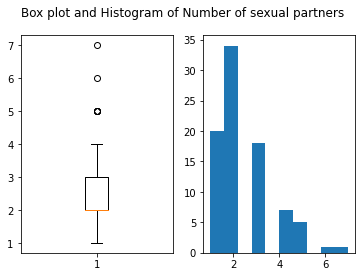

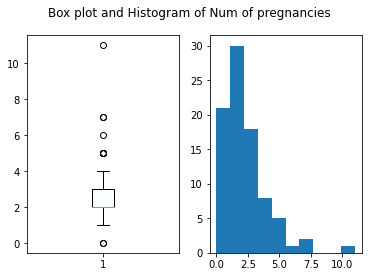

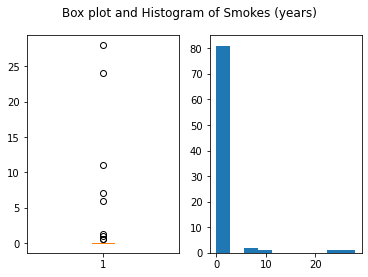

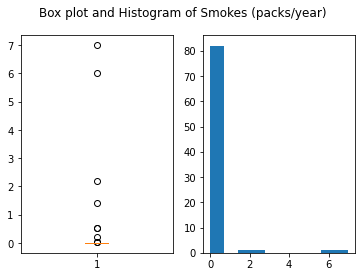

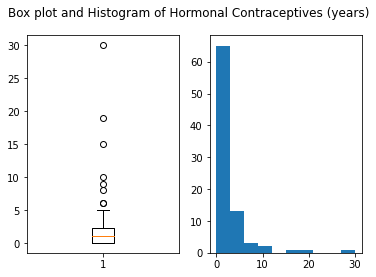

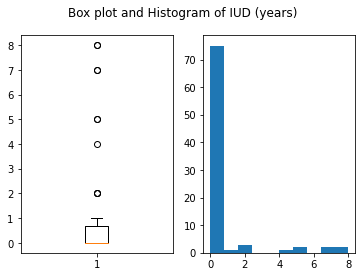

In [826]:
column_vald = [1,3,5,6,8,10]  # Index of identified columns
X_vald_outlier = X_vald_imputed.copy()

# Plot the distribution of the outlier columns
for num in column_vald:
    fig, (boxplot, hist) = plt.subplots(1, 2)
    fig.suptitle('Box plot and Histogram of '+ df.columns[num])
    boxplot.boxplot(X_vald_outlier.iloc[:,num:(num+1)])  # Boxplot
    hist.hist(X_vald_outlier.iloc[:,num:(num+1)])        # Histogram

In [827]:
# A copy of X_vald_sqrt where square root transformation will be applied
X_vald_sqrt = X_vald_outlier.copy()   

# Perform square root transformation on the columns with outliers
X_vald_sqrt.iloc[:,column] = np.sqrt(X_vald_sqrt.iloc[:,column])
X_vald_sqrt

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,30.0,1.414214,17.0,1.000000,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.0,2.44949,2.44949,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,43.0,2.000000,16.0,1.732051,1.0,5.291503,2.645751,0.000000,0.000000,1.000000,...,0.0,2.44949,2.44949,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,23.0,1.414214,14.0,2.645751,1.0,1.125599,0.716381,0.631579,1.525020,0.164384,...,0.0,2.44949,2.44949,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,38.0,1.414214,19.0,2.236068,0.0,0.000000,0.000000,1.000000,5.477226,0.164384,...,0.0,2.44949,2.44949,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,30.0,1.732051,22.0,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,2.44949,2.44949,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,24.0,1.732051,17.0,1.732051,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.0,2.44949,2.44949,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82,40.0,1.000000,20.0,2.645751,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,2.44949,2.44949,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83,45.0,1.414214,18.0,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,2.44949,2.44949,0.0,0.0,0.0,0.0,0.0,1.0,1.0
84,25.0,1.732051,17.0,1.732051,0.0,0.000000,0.000000,1.000000,1.732051,0.000000,...,0.0,2.44949,2.44949,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 0.98, 'Box plot and Histogram of Number of sexual partners')

{'whiskers': [<matplotlib.lines.Line2D at 0x2573381bc70>,
 'caps': [<matplotlib.lines.Line2D at 0x25733825190>,
 'boxes': [<matplotlib.lines.Line2D at 0x2573381b9a0>],
 'medians': [<matplotlib.lines.Line2D at 0x25733825730>],
 'fliers': [<matplotlib.lines.Line2D at 0x25733825a00>],
 'means': []}

(array([20.,  0., 34.,  0., 18.,  0.,  7.,  5.,  1.,  1.]),
 array([1.        , 1.16457513, 1.32915026, 1.49372539, 1.65830052,
        1.82287566, 1.98745079, 2.15202592, 2.31660105, 2.48117618,
        2.64575131]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of Num of pregnancies')

{'whiskers': [<matplotlib.lines.Line2D at 0x257338adf10>,
 'caps': [<matplotlib.lines.Line2D at 0x257338b94f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x257338adc40>],
 'medians': [<matplotlib.lines.Line2D at 0x257338b9b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x257338b9e20>],
 'means': []}

(array([ 2.,  0.,  0., 19., 35., 13., 13.,  3.,  0.,  1.]),
 array([0.        , 0.33166248, 0.66332496, 0.99498744, 1.32664992,
        1.6583124 , 1.98997487, 2.32163735, 2.65329983, 2.98496231,
        3.31662479]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of Smokes (years)')

{'whiskers': [<matplotlib.lines.Line2D at 0x2573394c4f0>,
 'caps': [<matplotlib.lines.Line2D at 0x2573394c9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2573394c280>],
 'medians': [<matplotlib.lines.Line2D at 0x2573394cf70>],
 'fliers': [<matplotlib.lines.Line2D at 0x2573395d280>],
 'means': []}

(array([77.,  3.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  2.]),
 array([0.        , 0.52915026, 1.05830052, 1.58745079, 2.11660105,
        2.64575131, 3.17490157, 3.70405184, 4.2332021 , 4.76235236,
        5.29150262]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of Smokes (packs/year)')

{'whiskers': [<matplotlib.lines.Line2D at 0x257339e8850>,
 'caps': [<matplotlib.lines.Line2D at 0x257339e8d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x257339e85e0>],
 'medians': [<matplotlib.lines.Line2D at 0x257339f6310>],
 'fliers': [<matplotlib.lines.Line2D at 0x257339f65e0>],
 'means': []}

(array([79.,  1.,  2.,  0.,  1.,  1.,  0.,  0.,  0.,  2.]),
 array([0.        , 0.26457513, 0.52915026, 0.79372539, 1.05830052,
        1.32287566, 1.58745079, 1.85202592, 2.11660105, 2.38117618,
        2.64575131]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of Hormonal Contraceptives (years)')

{'whiskers': [<matplotlib.lines.Line2D at 0x25733a7c820>,
 'caps': [<matplotlib.lines.Line2D at 0x25733a7cdc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x257339bb070>],
 'medians': [<matplotlib.lines.Line2D at 0x25733a903a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25733a90670>],
 'means': []}

(array([36., 12., 17., 10.,  5.,  3.,  0.,  2.,  0.,  1.]),
 array([0.        , 0.54772256, 1.09544512, 1.64316767, 2.19089023,
        2.73861279, 3.28633535, 3.8340579 , 4.38178046, 4.92950302,
        5.47722558]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of IUD (years)')

{'whiskers': [<matplotlib.lines.Line2D at 0x25733b1ad30>,
 'caps': [<matplotlib.lines.Line2D at 0x25733b291f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25733b1aa60>],
 'medians': [<matplotlib.lines.Line2D at 0x25733b29790>],
 'fliers': [<matplotlib.lines.Line2D at 0x25733b29a60>],
 'means': []}

(array([61.,  0., 14.,  1.,  0.,  3.,  0.,  3.,  0.,  4.]),
 array([0.        , 0.28284271, 0.56568542, 0.84852814, 1.13137085,
        1.41421356, 1.69705627, 1.97989899, 2.2627417 , 2.54558441,
        2.82842712]),
 <BarContainer object of 10 artists>)

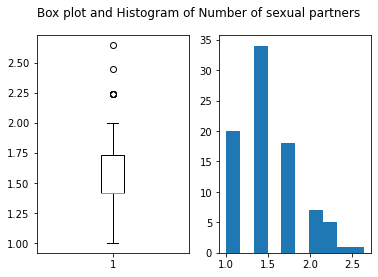

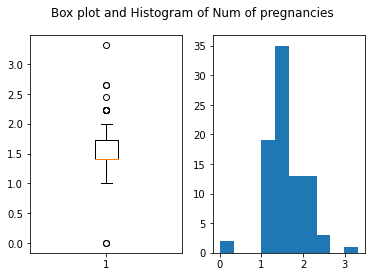

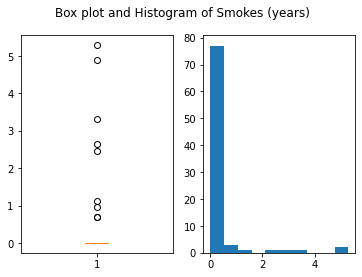

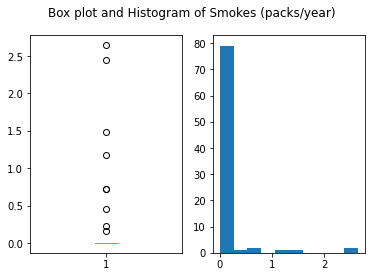

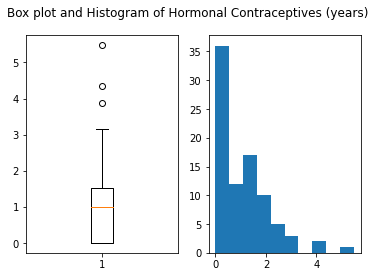

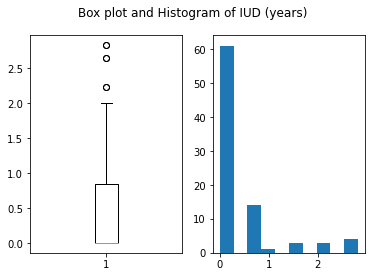

In [828]:
# Plot the distribution of the transformed outlier columns
for num in column_vald:
    fig, (boxplot, hist) = plt.subplots(1, 2)
    fig.suptitle('Box plot and Histogram of '+ df.columns[num])
    boxplot.boxplot(X_vald_sqrt.iloc[:,num:(num+1)])  # Boxplot
    hist.hist(X_vald_sqrt.iloc[:,num:(num+1)])        # Histogram


#### Test Set

In [829]:
X_test_imputed.iloc[:,0:18].describe(include = 'all')

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.0,86.0,86.000000,86.000000
mean,27.279070,2.418605,17.279070,2.543210,0.094118,0.920788,0.208252,0.631579,2.325687,0.164384,0.703151,0.080000,0.160000,0.053333,0.0,0.0,0.053333,0.026667
std,10.031305,1.269230,2.523542,1.680682,0.291992,4.195289,1.021208,0.456124,4.368348,0.343467,1.779016,0.254836,0.553917,0.211066,0.0,0.0,0.211066,0.151334
min,13.000000,1.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
25%,21.000000,2.000000,16.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
50%,24.500000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
75%,30.750000,3.000000,18.750000,3.000000,0.000000,0.000000,0.000000,1.000000,2.325687,0.164384,0.703151,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
max,84.000000,7.000000,27.000000,11.000000,1.000000,28.000000,7.000000,1.000000,30.000000,1.000000,8.000000,1.000000,3.000000,1.000000,0.0,0.0,1.000000,1.000000


In [830]:
X_test_imputed.iloc[:,18:].describe(include = 'all')

,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
count,86.0,86.0,86.0,86.0,86.000000,86.0,86.0,86.00000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,0.0,0.0,0.0,0.0,0.026667,0.0,0.0,0.05814,6.000000,6.000000,0.011628,0.011628,0.011628,0.023256,0.023256,0.069767,0.093023
std,0.0,0.0,0.0,0.0,0.151334,0.0,0.0,0.23538,0.766965,0.766965,0.107833,0.107833,0.107833,0.151599,0.151599,0.256249,0.292169
min,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,1.00000,11.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The identified columns with outliers are similar with those of the validation set, which are:
- Column[1]: Number of Sexual Partners
- Column[3]: Num of pregnancies
- Column[5]: Smokes (years)
- Column[6]: Smokes (packs/year)
- Column[8]: Hormonal Contraceptives (years)
- Column[10]: IUD (years)

From the plots below, we can see that the distributions of the columns stated above are skewed to the right, and outliers are indeed present.

Text(0.5, 0.98, 'Box plot and Histogram of Number of sexual partners')

{'whiskers': [<matplotlib.lines.Line2D at 0x25733cfcca0>,
 'caps': [<matplotlib.lines.Line2D at 0x25733d07160>,
 'boxes': [<matplotlib.lines.Line2D at 0x25733cfc9d0>],
 'medians': [<matplotlib.lines.Line2D at 0x25733d07700>],
 'fliers': [<matplotlib.lines.Line2D at 0x25733d079d0>],
 'means': []}

(array([20., 34.,  0., 18.,  0.,  7.,  5.,  0.,  1.,  1.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of Num of pregnancies')

{'whiskers': [<matplotlib.lines.Line2D at 0x25733d8ec10>,
 'caps': [<matplotlib.lines.Line2D at 0x25733d9c130>,
 'boxes': [<matplotlib.lines.Line2D at 0x25733d8e940>],
 'medians': [<matplotlib.lines.Line2D at 0x25733d9c6d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25733d9c9a0>],
 'means': []}

(array([21., 30., 18.,  8.,  5.,  1.,  2.,  0.,  0.,  1.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of Smokes (years)')

{'whiskers': [<matplotlib.lines.Line2D at 0x25733e31070>,
 'caps': [<matplotlib.lines.Line2D at 0x25733e314f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25733e21d00>],
 'medians': [<matplotlib.lines.Line2D at 0x25733e31a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x25733e31d60>],
 'means': []}

(array([81.,  0.,  2.,  1.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([ 0. ,  2.8,  5.6,  8.4, 11.2, 14. , 16.8, 19.6, 22.4, 25.2, 28. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of Smokes (packs/year)')

{'whiskers': [<matplotlib.lines.Line2D at 0x25733ecc1f0>,
 'caps': [<matplotlib.lines.Line2D at 0x25733ecc790>,
 'boxes': [<matplotlib.lines.Line2D at 0x25733ebaee0>],
 'medians': [<matplotlib.lines.Line2D at 0x25733ecccd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25733eccfa0>],
 'means': []}

(array([82.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of Hormonal Contraceptives (years)')

{'whiskers': [<matplotlib.lines.Line2D at 0x25733f56fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x25733f625b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25733f56d00>],
 'medians': [<matplotlib.lines.Line2D at 0x25733f62b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x25733f62e20>],
 'means': []}

(array([65., 13.,  3.,  2.,  0.,  1.,  1.,  0.,  0.,  1.]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of IUD (years)')

{'whiskers': [<matplotlib.lines.Line2D at 0x257340054c0>,
 'caps': [<matplotlib.lines.Line2D at 0x25734005a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x257340051f0>],
 'medians': [<matplotlib.lines.Line2D at 0x2573400e040>],
 'fliers': [<matplotlib.lines.Line2D at 0x2573400e310>],
 'means': []}

(array([75.,  1.,  3.,  0.,  0.,  1.,  2.,  0.,  2.,  2.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

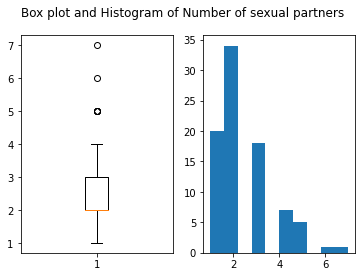

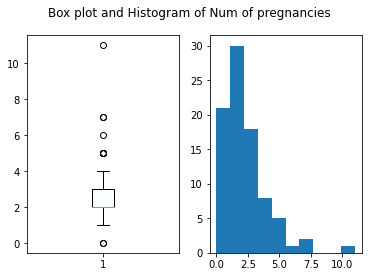

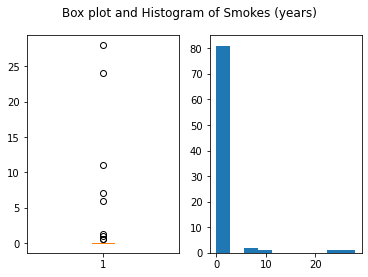

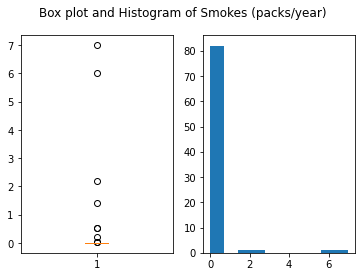

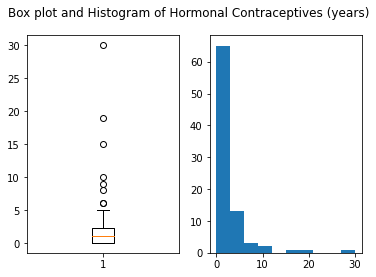

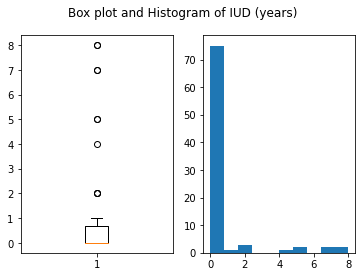

In [831]:
column_test = [1,3,5,6,8,10]  # Index of identified columns
X_test_outlier = X_test_imputed.copy()

# Plot the distribution of the outlier columns
for num in column_test:
    fig, (boxplot, hist) = plt.subplots(1, 2)
    fig.suptitle('Box plot and Histogram of '+ df.columns[num])
    boxplot.boxplot(X_test_outlier.iloc[:,num:(num+1)])  # Boxplot
    hist.hist(X_test_outlier.iloc[:,num:(num+1)])        # Histogram

In [832]:
# A copy of X_vald_sqrt where square root transformation will be applied
X_test_sqrt = X_test_outlier.copy()   

# Perform square root transformation on the columns with outliers
X_test_sqrt.iloc[:,column] = np.sqrt(X_test_sqrt.iloc[:,column])
X_test_sqrt

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,30.0,1.414214,17.0,1.000000,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.0,2.44949,2.44949,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,43.0,2.000000,16.0,1.732051,1.0,5.291503,2.645751,0.000000,0.000000,1.000000,...,0.0,2.44949,2.44949,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,23.0,1.414214,14.0,2.645751,1.0,1.125599,0.716381,0.631579,1.525020,0.164384,...,0.0,2.44949,2.44949,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,38.0,1.414214,19.0,2.236068,0.0,0.000000,0.000000,1.000000,5.477226,0.164384,...,0.0,2.44949,2.44949,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,30.0,1.732051,22.0,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,2.44949,2.44949,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,24.0,1.732051,17.0,1.732051,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.0,2.44949,2.44949,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82,40.0,1.000000,20.0,2.645751,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,2.44949,2.44949,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83,45.0,1.414214,18.0,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,2.44949,2.44949,0.0,0.0,0.0,0.0,0.0,1.0,1.0
84,25.0,1.732051,17.0,1.732051,0.0,0.000000,0.000000,1.000000,1.732051,0.000000,...,0.0,2.44949,2.44949,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 0.98, 'Box plot and Histogram of Number of sexual partners')

{'whiskers': [<matplotlib.lines.Line2D at 0x257351ba880>,
 'caps': [<matplotlib.lines.Line2D at 0x257351bae20>,
 'boxes': [<matplotlib.lines.Line2D at 0x257351ba5b0>],
 'medians': [<matplotlib.lines.Line2D at 0x257351c8400>],
 'fliers': [<matplotlib.lines.Line2D at 0x257351c86d0>],
 'means': []}

(array([20.,  0., 34.,  0., 18.,  0.,  7.,  5.,  1.,  1.]),
 array([1.        , 1.16457513, 1.32915026, 1.49372539, 1.65830052,
        1.82287566, 1.98745079, 2.15202592, 2.31660105, 2.48117618,
        2.64575131]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of Num of pregnancies')

{'whiskers': [<matplotlib.lines.Line2D at 0x2573524abe0>,
 'caps': [<matplotlib.lines.Line2D at 0x257352591c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2573524a910>],
 'medians': [<matplotlib.lines.Line2D at 0x25735259760>],
 'fliers': [<matplotlib.lines.Line2D at 0x25735259a30>],
 'means': []}

(array([ 2.,  0.,  0., 19., 35., 13., 13.,  3.,  0.,  1.]),
 array([0.        , 0.33166248, 0.66332496, 0.99498744, 1.32664992,
        1.6583124 , 1.98997487, 2.32163735, 2.65329983, 2.98496231,
        3.31662479]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of Smokes (years)')

{'whiskers': [<matplotlib.lines.Line2D at 0x257352ef100>,
 'caps': [<matplotlib.lines.Line2D at 0x257352ef6a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x257352dcdf0>],
 'medians': [<matplotlib.lines.Line2D at 0x257352efc40>],
 'fliers': [<matplotlib.lines.Line2D at 0x257352eff10>],
 'means': []}

(array([77.,  3.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  2.]),
 array([0.        , 0.52915026, 1.05830052, 1.58745079, 2.11660105,
        2.64575131, 3.17490157, 3.70405184, 4.2332021 , 4.76235236,
        5.29150262]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of Smokes (packs/year)')

{'whiskers': [<matplotlib.lines.Line2D at 0x257350dd910>,
 'caps': [<matplotlib.lines.Line2D at 0x257350e1100>,
 'boxes': [<matplotlib.lines.Line2D at 0x257350dd0a0>],
 'medians': [<matplotlib.lines.Line2D at 0x257350e1af0>],
 'fliers': [<matplotlib.lines.Line2D at 0x257350e1220>],
 'means': []}

(array([79.,  1.,  2.,  0.,  1.,  1.,  0.,  0.,  0.,  2.]),
 array([0.        , 0.26457513, 0.52915026, 0.79372539, 1.05830052,
        1.32287566, 1.58745079, 1.85202592, 2.11660105, 2.38117618,
        2.64575131]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of Hormonal Contraceptives (years)')

{'whiskers': [<matplotlib.lines.Line2D at 0x257340ac2e0>,
 'caps': [<matplotlib.lines.Line2D at 0x257340acc40>,
 'boxes': [<matplotlib.lines.Line2D at 0x257340ac700>],
 'medians': [<matplotlib.lines.Line2D at 0x25735095c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x25735095e80>],
 'means': []}

(array([36., 12., 17., 10.,  5.,  3.,  0.,  2.,  0.,  1.]),
 array([0.        , 0.54772256, 1.09544512, 1.64316767, 2.19089023,
        2.73861279, 3.28633535, 3.8340579 , 4.38178046, 4.92950302,
        5.47722558]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of IUD (years)')

{'whiskers': [<matplotlib.lines.Line2D at 0x25733c90220>,
 'caps': [<matplotlib.lines.Line2D at 0x25733c70c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x25733c90550>],
 'medians': [<matplotlib.lines.Line2D at 0x25733c88eb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25733c88f10>],
 'means': []}

(array([61.,  0., 14.,  1.,  0.,  3.,  0.,  3.,  0.,  4.]),
 array([0.        , 0.28284271, 0.56568542, 0.84852814, 1.13137085,
        1.41421356, 1.69705627, 1.97989899, 2.2627417 , 2.54558441,
        2.82842712]),
 <BarContainer object of 10 artists>)

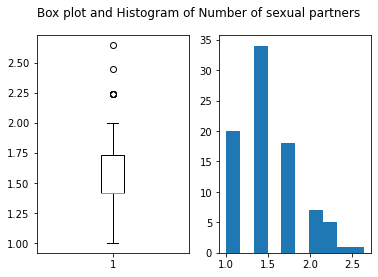

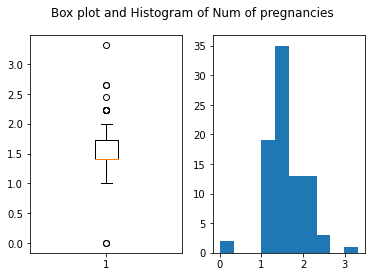

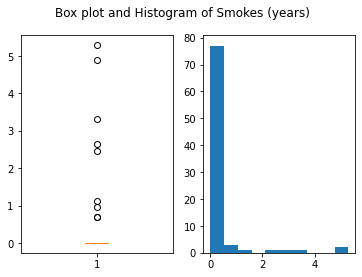

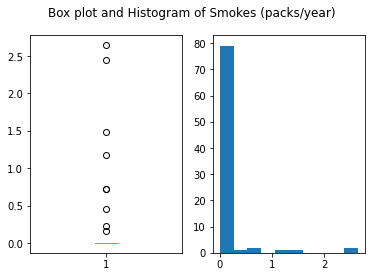

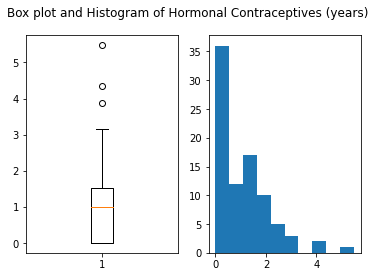

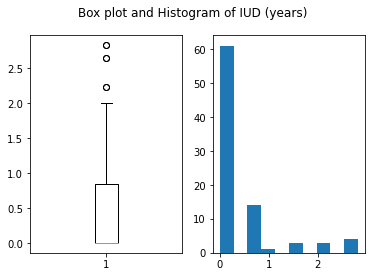

In [833]:
# Plot the distribution of the transformed outlier columns
for num in column_test:
    fig, (boxplot, hist) = plt.subplots(1, 2)
    fig.suptitle('Box plot and Histogram of '+ df.columns[num])
    boxplot.boxplot(X_test_sqrt.iloc[:,num:(num+1)])  # Boxplot
    hist.hist(X_test_sqrt.iloc[:,num:(num+1)])        # Histogram


### Imbalanced Data

#### Training Set

In [834]:
# Display the number of values for each class in y
y_train.value_counts()

0    722
1     50
Name: Biopsy, dtype: int64

c:\Users\looiw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, '722'), Text(0, 0, '50')]

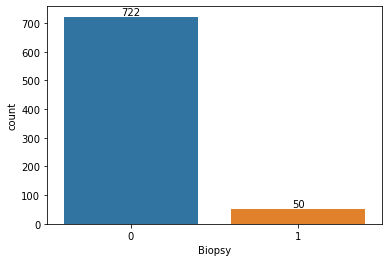

In [835]:
# Plot the graph to visualize the imbalance of the target column
y_train_countplot = sns.countplot(y_train)

for container in y_train_countplot.containers:
    y_train_countplot.bar_label(container)

As we observe from the numbers and graph above, we can see that there is an extreme uneven distribution of values for class 0 and 1. The majority class is 94%（722 out of 772 records) with a negative biopsy diagnosis, while the minority class is only 6% (50 out of 772 records) with a positive biopsy diagnosis. This may cause a biased prediction by our classification models.

Thus, we will deal with this imbalance by oversampling the minority class by resampling, using the resample() function from the sklearn.utils library.

In [836]:
# Reset index for y_train to concatenate with X_train_sqrt
y_train_reset_index = (y_train.reset_index()).drop('index', axis = 1)
y_train_reset_index

,Biopsy
0,0
1,0
2,0
3,0
4,0
...,...
767,0
768,0
769,0
770,0


In [837]:
# Combining X_train and y_train into a dataframe for easy operation
train = pd.concat([X_train_sqrt, y_train_reset_index], axis = 1)
train

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,20.0,1.593805,16.0,1.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,2.480225,2.408948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,20.0,1.000000,18.0,1.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,17.0,1.000000,16.0,1.000000,0.0,0.000000,0.0,0.642433,1.499536,0.106287,...,2.480225,2.408948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,18.0,1.000000,17.0,1.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,2.480225,2.408948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,26.0,1.414214,17.0,1.498497,1.0,3.162278,1.0,1.000000,1.732051,0.000000,...,2.480225,2.408948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,24.0,1.000000,14.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,2.480225,2.408948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
768,27.0,1.414214,17.0,2.000000,0.0,0.000000,0.0,1.000000,1.414214,0.000000,...,2.480225,2.408948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
769,24.0,1.000000,17.0,1.732051,0.0,0.000000,0.0,1.000000,2.449490,0.000000,...,2.480225,2.408948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
770,20.0,1.000000,16.0,1.414214,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,2.480225,2.408948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [838]:
# Create two different dataframe for class 0 and 1
train_major = train[(train['Biopsy']==0)]  # class 0 is the majority class
train_minor = train[(train['Biopsy']==1)]  # class 1 is the minority class

# Oversample the minority class with the number of majority class = 722
train_minor_upsampled = resample(train_minor, replace=True, n_samples = 722, random_state = 42)

# Combine majority class with upsampled minority class
train_upsampled = pd.concat([train_minor_upsampled, train_major])

# Shuffle the rows in the dataframe, so that the class samples are not grouped together
train_upsampled = shuffle(train_upsampled)

train_upsampled['Biopsy']

83     0
108    0
60     1
174    1
231    0
      ..
760    1
664    1
702    1
618    0
386    0
Name: Biopsy, Length: 1444, dtype: int64

In [839]:
# Check if the value for each class is balanced
train_upsampled['Biopsy'].value_counts()

0    722
1    722
Name: Biopsy, dtype: int64

[Text(0, 0, '722'), Text(0, 0, '722')]

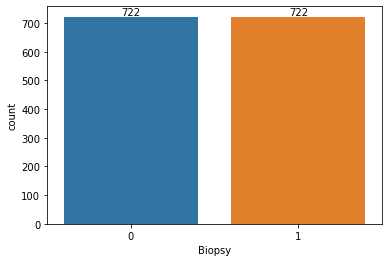

In [840]:
# Visualise the balanced data
y_train_countplot = sns.countplot(data = train_upsampled, x = 'Biopsy')

for container in y_train_countplot.containers:
    y_train_countplot.bar_label(container)

As shown above, the class distribution is now balanced, with 722 records respectively for both class 0 and class 1.

In [841]:
train_upsampled.shape

(1444, 36)

In [842]:
# Split the dataframe back into feature columns and target column
X_train_balanced = train_upsampled.drop('Biopsy', axis = 1)
y_train_balanced = train_upsampled['Biopsy']

In [843]:
X_train_balanced.shape

(1444, 35)

In [844]:
y_train_balanced.shape

(1444,)

Repeat the steps separately for validation set and test set.

#### Validation Set

In [845]:
# Display the number of values for each class in y
y_vald.value_counts()

0    81
1     5
Name: Biopsy, dtype: int64

In [846]:
# Reset index for y_vald to concatenate with X_vald_sqrt
y_vald_reset_index = (y_vald.reset_index()).drop('index', axis = 1)

# Combining X_train and y_train into a dataframe for easy operation
vald = pd.concat([X_vald_sqrt, y_vald_reset_index], axis = 1)

# Create two different dataframe for class 0 and 1
vald_major = vald[(vald['Biopsy']==0)]  # class 0 is the majority class
vald_minor = vald[(vald['Biopsy']==1)]  # class 1 is the minority class

# Oversample the minority class with the number of majority class = 81
vald_minor_upsampled = resample(vald_minor, replace=True, n_samples = 81, random_state = 42)

# Combine majority class with upsampled minority class
vald_upsampled = pd.concat([vald_minor_upsampled, vald_major])

# Shuffle the rows in the dataframe, so that the class samples are not grouped together
vald_upsampled = shuffle(vald_upsampled)

vald_upsampled['Biopsy']

61    1
17    0
58    1
61    1
61    1
     ..
80    1
45    1
16    0
62    0
2     0
Name: Biopsy, Length: 162, dtype: int64

In [847]:
# Check if the value for each class is balanced
vald_upsampled['Biopsy'].value_counts()

1    81
0    81
Name: Biopsy, dtype: int64

[Text(0, 0, '81'), Text(0, 0, '81')]

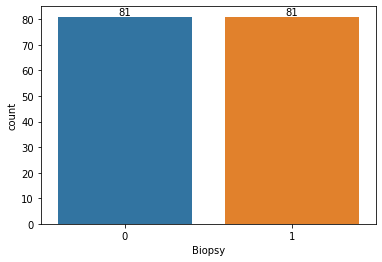

In [848]:
# Visualise the balanced data
y_vald_countplot = sns.countplot(data = vald_upsampled, x = "Biopsy")

for container in y_vald_countplot.containers:
    y_vald_countplot.bar_label(container)


In [861]:
vald_upsampled.shape

(162, 36)

In [863]:
# Split the dataframe back into feature columns and target column
X_vald_balanced = vald_upsampled.drop('Biopsy', axis = 1)
y_vald_balanced = vald_upsampled['Biopsy']

In [864]:
X_vald_balanced.shape

(162, 35)

In [865]:
y_vald_balanced.shape

(162,)

#### Test Set

In [849]:
# Display the number of values for each class in y
y_test.value_counts()

0    81
1     5
Name: Biopsy, dtype: int64

In [850]:
# Reset index for y_test to concatenate with X_test_sqrt
y_test_reset_index = (y_test.reset_index()).drop('index', axis = 1)

# Combining X_train and y_train into a dataframe for easy operation
test = pd.concat([X_test_sqrt, y_test_reset_index], axis = 1)

# Create two different dataframe for class 0 and 1
test_major = test[(test['Biopsy']==0)]  # class 0 is the majority class
test_minor = test[(test['Biopsy']==1)]  # class 1 is the minority class

# Oversample the minority class with the number of majority class = 81
test_minor_upsampled = resample(test_minor, replace=True, n_samples = 81, random_state = 42)

# Combine majority class with upsampled minority class
test_upsampled = pd.concat([test_minor_upsampled, test_major])

# Shuffle the rows in the dataframe, so that the class samples are not grouped together
test_upsampled = shuffle(test_upsampled)

test_upsampled['Biopsy']

60    0
80    1
72    0
61    1
45    1
     ..
43    0
17    0
83    0
18    1
61    1
Name: Biopsy, Length: 162, dtype: int64

In [851]:
# Check if the value for each class is balanced
test_upsampled['Biopsy'].value_counts()

0    81
1    81
Name: Biopsy, dtype: int64

[Text(0, 0, '81'), Text(0, 0, '81')]

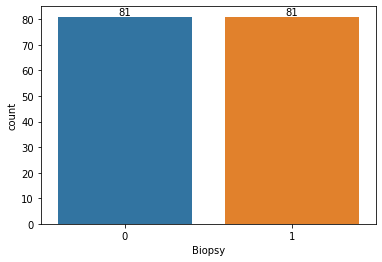

In [852]:
# Visualise the balanced data
y_test_countplot = sns.countplot(data = test_upsampled, x = "Biopsy")

for container in y_test_countplot.containers:
    y_test_countplot.bar_label(container)

In [866]:
test_upsampled.shape

(162, 36)

In [867]:
# Split the dataframe back into feature columns and target column
X_test_balanced = test_upsampled.drop('Biopsy', axis = 1)
y_test_balanced = test_upsampled['Biopsy']

In [868]:
X_test_balanced.shape

(162, 35)

In [869]:
y_test_balanced.shape

(162,)

### Data Normalization

In [853]:
columns_need_norm = [] # Columns in the dataframe that needs to be normalized

# Function for Normalisation using MinMaxScaler
def Norm_MinMaxScaler(df):
    for num in columns_need_norm:
        df_copy = df
        scaler = MinMaxScaler()
        df_copy.iloc[:,num:(num+1)] = scaler.fit_transform(df_copy.iloc[:,num:(num+1)])
    df_normalized = pd.DataFrame(df_copy, columns = df.columns)
    return df_normalized

In [854]:
X_train_sqrt.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
count,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,...,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000
mean,26.769430,1.534234,16.963399,1.428461,0.151316,0.405526,0.223127,0.642433,1.075401,0.106287,...,0.090674,2.457574,2.386027,0.022021,0.010363,0.022021,0.028497,0.042746,0.088083,0.046632
std,8.315672,0.431950,2.819925,0.453053,0.355791,1.044086,0.656739,0.448121,1.045723,0.286880,...,0.309078,0.334649,0.331734,0.146846,0.101334,0.146846,0.166497,0.202415,0.283599,0.210986
min,14.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,1.414214,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.480225,2.408948,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.500000,1.414214,17.000000,1.414214,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,2.480225,2.408948,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,1.732051,18.000000,1.732051,0.000000,0.000000,0.000000,1.000000,1.499536,0.000000,...,0.000000,2.480225,2.408948,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,79.000000,5.291503,32.000000,3.162278,1.000000,6.082763,6.082763,1.000000,4.690416,1.000000,...,3.000000,4.690416,4.690416,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [859]:
X_train_balanced.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
count,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,...,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000
mean,27.977839,1.520412,17.103701,1.479170,0.156737,0.457211,0.246084,0.666176,1.185268,0.148779,...,0.128116,2.445337,2.379592,0.067175,0.027008,0.067175,0.071330,0.268698,0.472299,0.150970
std,8.796510,0.405490,2.780299,0.421135,0.360977,1.157133,0.682612,0.454905,1.233222,0.341940,...,0.344543,0.399860,0.395434,0.250411,0.162164,0.250411,0.257464,0.443436,0.499405,0.358143
min,14.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,1.414214,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.480225,2.408948,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,1.414214,17.000000,1.414214,0.000000,0.000000,0.000000,1.000000,0.761577,0.000000,...,0.000000,2.480225,2.408948,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,34.000000,1.732051,18.000000,1.732051,0.000000,0.000000,0.000000,1.000000,1.732051,0.000000,...,0.000000,2.480225,2.408948,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,79.000000,5.291503,32.000000,3.162278,1.000000,6.082763,6.082763,1.000000,4.690416,1.000000,...,3.000000,4.690416,4.690416,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


From the max values of each column, we can see that the following columns from both balanced data and imbalanced data needs to be normalised:

- Column[0]: Age
- Column[1]: Number of sexual partners
- Column[2]: First sexual intercourse
- Column[3]: Num of pregnancies
- Column[5]: Smokes (years)
- Column[6]: Smokes (packs/year)
- Column[8]: Hormonal Contraceptives (years)
- Column[10]: IUD (years)
- Column[12]: STDs (number)
- Column[25]: STDs: Number of diagnosis
- Column[26]: STDs: Time since first diagnosis
- Column[27]: STDs: Time since last diagnosis


Imbalanced Data

In [855]:
# Columns identified that needs normalization
columns_need_norm = [0,1,2,3,5,6,8,10,12,25,26,27]

X_train_norm = Norm_MinMaxScaler(X_train_sqrt)
X_vald_norm = Norm_MinMaxScaler(X_vald_sqrt)
X_test_norm = Norm_MinMaxScaler(X_test_sqrt)

In [856]:
X_train_norm

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,0.092308,0.138368,0.272727,0.316228,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.4011,0.381786,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.092308,0.000000,0.363636,0.316228,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.333333,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.046154,0.000000,0.272727,0.316228,0.0,0.000000,0.000000,0.642433,0.319702,0.106287,...,0.000000,0.4011,0.381786,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.061538,0.000000,0.318182,0.316228,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.4011,0.381786,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.184615,0.096519,0.318182,0.473866,1.0,0.519875,0.164399,1.000000,0.369274,0.000000,...,0.000000,0.4011,0.381786,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,0.153846,0.000000,0.181818,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.4011,0.381786,0.0,0.0,0.0,0.0,0.0,0.0,0.0
768,0.200000,0.096519,0.318182,0.632456,0.0,0.000000,0.000000,1.000000,0.301511,0.000000,...,0.000000,0.4011,0.381786,0.0,0.0,0.0,0.0,0.0,0.0,0.0
769,0.153846,0.000000,0.318182,0.547723,0.0,0.000000,0.000000,1.000000,0.522233,0.000000,...,0.000000,0.4011,0.381786,0.0,0.0,0.0,0.0,0.0,0.0,0.0
770,0.092308,0.000000,0.272727,0.447214,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.4011,0.381786,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [857]:
X_vald_norm

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,0.239437,0.251687,0.285714,0.301511,0.0,0.000000,0.000000,1.000000,0.182574,0.000000,...,0.0,0.544192,0.544192,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.422535,0.607625,0.214286,0.522233,1.0,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.0,0.544192,0.544192,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.140845,0.251687,0.071429,0.797724,1.0,0.212718,0.270767,0.631579,0.278429,0.164384,...,0.0,0.544192,0.544192,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.352113,0.251687,0.428571,0.674200,0.0,0.000000,0.000000,1.000000,1.000000,0.164384,...,0.0,0.544192,0.544192,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.239437,0.444813,0.642857,0.301511,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.544192,0.544192,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,0.154930,0.444813,0.285714,0.522233,0.0,0.000000,0.000000,1.000000,0.182574,0.000000,...,0.0,0.544192,0.544192,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82,0.380282,0.000000,0.500000,0.797724,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.544192,0.544192,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83,0.450704,0.251687,0.357143,0.603023,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.544192,0.544192,0.0,0.0,0.0,0.0,0.0,1.0,1.0
84,0.169014,0.444813,0.285714,0.522233,0.0,0.000000,0.000000,1.000000,0.316228,0.000000,...,0.0,0.544192,0.544192,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [858]:
X_test_norm

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,0.239437,0.251687,0.285714,0.301511,0.0,0.000000,0.000000,1.000000,0.182574,0.000000,...,0.0,0.544192,0.544192,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.422535,0.607625,0.214286,0.522233,1.0,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.0,0.544192,0.544192,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.140845,0.251687,0.071429,0.797724,1.0,0.212718,0.270767,0.631579,0.278429,0.164384,...,0.0,0.544192,0.544192,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.352113,0.251687,0.428571,0.674200,0.0,0.000000,0.000000,1.000000,1.000000,0.164384,...,0.0,0.544192,0.544192,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.239437,0.444813,0.642857,0.301511,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.544192,0.544192,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,0.154930,0.444813,0.285714,0.522233,0.0,0.000000,0.000000,1.000000,0.182574,0.000000,...,0.0,0.544192,0.544192,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82,0.380282,0.000000,0.500000,0.797724,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.544192,0.544192,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83,0.450704,0.251687,0.357143,0.603023,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.544192,0.544192,0.0,0.0,0.0,0.0,0.0,1.0,1.0
84,0.169014,0.444813,0.285714,0.522233,0.0,0.000000,0.000000,1.000000,0.316228,0.000000,...,0.0,0.544192,0.544192,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Balanced Data

In [870]:
# Columns identified that needs normalization
columns_need_norm = [0,1,2,3,5,6,8,10,12,25,26,27]

X_train_norm_balanced = Norm_MinMaxScaler(X_train_balanced)
X_vald_norm_balanced = Norm_MinMaxScaler(X_vald_balanced)
X_test_norm_balanced = Norm_MinMaxScaler(X_test_balanced)

In [871]:
X_train_norm_balanced

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
83,0.076923,0.000000,0.181818,0.447214,0.0,0.000000,0.000000,1.0,0.261116,0.0,...,0.0,0.4011,0.381786,0.0,0.0,0.0,0.0,0.0,0.0,0.0
108,0.215385,0.096519,0.227273,0.473866,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.4011,0.381786,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60,0.123077,0.233019,0.272727,0.316228,0.0,0.000000,0.000000,1.0,0.150756,0.0,...,0.0,0.4011,0.381786,0.0,0.0,0.0,0.0,0.0,1.0,0.0
174,0.507692,0.096519,0.318182,0.547723,0.0,0.000000,0.000000,1.0,0.953463,0.0,...,0.0,0.4011,0.381786,0.0,0.0,0.0,0.0,0.0,1.0,1.0
231,0.046154,0.170581,0.136364,0.316228,1.0,0.232495,0.164399,0.0,0.000000,0.0,...,0.0,0.4011,0.381786,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,0.215385,0.233019,0.363636,0.632456,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.4011,0.381786,0.0,0.0,0.0,0.0,0.0,1.0,0.0
664,0.107692,0.096519,0.363636,0.547723,0.0,0.000000,0.000000,0.0,0.000000,1.0,...,0.0,0.4011,0.381786,1.0,0.0,1.0,1.0,1.0,1.0,0.0
702,0.123077,0.170581,0.318182,0.316228,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.4011,0.381786,0.0,0.0,0.0,0.0,1.0,1.0,0.0
618,0.292308,0.170581,0.272727,0.447214,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.4011,0.381786,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [872]:
X_vald_norm_balanced

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
61,0.169014,0.880747,0.285714,0.426401,0.0,0.000000,0.000000,1.000000,0.258199,0.000000,...,1.0,0.307918,0.307918,0.0,0.0,0.0,0.0,0.0,1.0,1.0
17,0.056338,0.251687,0.142857,0.426401,0.0,0.000000,0.000000,0.631579,0.278429,0.164384,...,0.0,0.544192,0.544192,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58,0.352113,0.444813,0.357143,0.603023,0.0,0.000000,0.000000,1.000000,0.577350,1.000000,...,0.0,0.544192,0.544192,0.0,0.0,0.0,0.0,0.0,1.0,1.0
61,0.169014,0.880747,0.285714,0.426401,0.0,0.000000,0.000000,1.000000,0.258199,0.000000,...,1.0,0.307918,0.307918,0.0,0.0,0.0,0.0,0.0,1.0,1.0
61,0.169014,0.880747,0.285714,0.426401,0.0,0.000000,0.000000,1.000000,0.258199,0.000000,...,1.0,0.307918,0.307918,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,0.211268,0.751066,0.142857,0.603023,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.544192,0.544192,0.0,0.0,0.0,0.0,0.0,1.0,1.0
45,0.112676,0.444813,0.285714,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.544192,0.544192,0.0,1.0,0.0,1.0,0.0,0.0,0.0
16,0.084507,0.000000,0.142857,0.301511,0.0,0.000000,0.000000,1.000000,0.365148,0.000000,...,0.0,0.544192,0.544192,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62,0.056338,0.000000,0.214286,0.426401,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [873]:
X_test_norm_balanced

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
60,0.070423,0.444813,0.071429,0.426401,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.544192,0.544192,0.0,0.0,0.0,0.0,0.0,0.0,1.0
80,0.211268,0.751066,0.142857,0.603023,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.544192,0.544192,0.0,0.0,0.0,0.0,0.0,1.0,1.0
72,0.154930,0.607625,0.357143,0.603023,0.0,0.0,0.0,1.000000,0.365148,0.000000,...,0.0,0.544192,0.544192,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61,0.169014,0.880747,0.285714,0.426401,0.0,0.0,0.0,1.000000,0.258199,0.000000,...,1.0,0.307918,0.307918,0.0,0.0,0.0,0.0,0.0,1.0,1.0
45,0.112676,0.444813,0.285714,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.544192,0.544192,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,0.154930,0.251687,0.285714,0.426401,0.0,0.0,0.0,0.631579,0.278429,0.164384,...,0.0,0.544192,0.544192,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.056338,0.251687,0.142857,0.426401,0.0,0.0,0.0,0.631579,0.278429,0.164384,...,0.0,0.544192,0.544192,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83,0.450704,0.251687,0.357143,0.603023,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.544192,0.544192,0.0,0.0,0.0,0.0,0.0,1.0,1.0
18,0.098592,0.444813,0.285714,0.426401,0.0,0.0,0.0,1.000000,0.091287,0.000000,...,0.0,0.544192,0.544192,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Data Standardization 

In [879]:
columns_need_std = [] # Columns in the dataframe that needs to be standardized

# Function for Normalisation using MinMaxScaler
def Std_StandardScaler(df):
    for num in columns_need_norm:
        df_copy = df
        scaler = StandardScaler()
        df_copy.iloc[:,num:(num+1)] = scaler.fit_transform(df_copy.iloc[:,num:(num+1)])
    df_normalized = pd.DataFrame(df_copy, columns = df.columns)
    return df_normalized

In [876]:
df.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

We want to standardize only numeric data and not categorical data, therefore only the following columns are chosen, similar to those that are normalized:

- Column[0]: Age
- Column[1]: Number of sexual partners
- Column[2]: First sexual intercourse
- Column[3]: Num of pregnancies
- Column[5]: Smokes (years)
- Column[6]: Smokes (packs/year)
- Column[8]: Hormonal Contraceptives (years)
- Column[10]: IUD (years)
- Column[12]: STDs (number)
- Column[25]: STDs: Number of diagnosis
- Column[26]: STDs: Time since first diagnosis
- Column[27]: STDs: Time since last diagnosis

Imbalanced Data

In [880]:
# Columns identified that needs normalization
columns_need_std = [0,1,2,3,5,6,8,10,12,25,26,27]

X_train_std = Std_StandardScaler(X_train_norm)
X_vald_std = Std_StandardScaler(X_vald_norm)
X_test_std = Std_StandardScaler(X_test_norm)

In [881]:
X_train_std

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,-0.814585,0.138000,-0.341861,-0.946334,0.0,-0.388654,-0.339970,0.000000,-1.029047,0.000000,...,-0.293558,0.067729,0.069139,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.814585,-1.237598,0.367837,-0.946334,0.0,-0.388654,-0.339970,0.000000,-1.029047,0.000000,...,2.943972,-4.358360,-4.180839,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.175583,-1.237598,-0.341861,-0.946334,0.0,-0.388654,-0.339970,0.642433,0.405853,0.106287,...,-0.293558,0.067729,0.069139,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.055250,-1.237598,0.012988,-0.946334,0.0,-0.388654,-0.339970,0.000000,-1.029047,0.000000,...,-0.293558,0.067729,0.069139,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.092588,-0.278038,0.012988,0.154686,1.0,2.642061,1.183692,1.000000,0.628345,0.000000,...,-0.293558,0.067729,0.069139,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,-0.333253,-1.237598,-1.051560,-3.155014,0.0,-0.388654,-0.339970,0.000000,-1.029047,0.000000,...,-0.293558,0.067729,0.069139,0.0,0.0,0.0,0.0,0.0,0.0,0.0
768,0.027745,-0.278038,0.012988,1.262346,0.0,-0.388654,-0.339970,1.000000,0.324208,0.000000,...,-0.293558,0.067729,0.069139,0.0,0.0,0.0,0.0,0.0,0.0,0.0
769,-0.333253,-1.237598,0.012988,0.670532,0.0,-0.388654,-0.339970,1.000000,1.314860,0.000000,...,-0.293558,0.067729,0.069139,0.0,0.0,0.0,0.0,0.0,0.0,0.0
770,-0.814585,-1.237598,-0.341861,-0.031469,0.0,-0.388654,-0.339970,0.000000,-1.029047,0.000000,...,-0.293558,0.067729,0.069139,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [882]:
X_vald_std

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,0.272835,-0.237682,-0.111235,-1.021258,0.0,-0.277978,-0.264419,1.000000,-0.058782,0.000000,...,-0.248452,0.032776,0.032776,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.576379,1.275434,-0.509828,0.434864,1.0,5.445524,5.732522,0.000000,-0.974270,1.000000,...,-0.248452,0.032776,0.032776,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.429073,-0.237682,-1.307013,2.252304,1.0,0.939515,1.359353,0.631579,0.421868,0.164384,...,-0.248452,0.032776,0.032776,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.075016,-0.237682,0.685950,1.437404,0.0,-0.277978,-0.264419,1.000000,4.040066,0.164384,...,-0.248452,0.032776,0.032776,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.272835,0.583307,1.881728,-1.021258,0.0,-0.277978,-0.264419,0.000000,-0.974270,0.000000,...,-0.248452,0.032776,0.032776,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,-0.328801,0.583307,-0.111235,0.434864,0.0,-0.277978,-0.264419,1.000000,-0.058782,0.000000,...,-0.248452,0.032776,0.032776,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82,1.275561,-1.307617,1.084543,2.252304,0.0,-0.277978,-0.264419,0.000000,-0.974270,0.000000,...,-0.248452,0.032776,0.032776,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83,1.776924,-0.237682,0.287357,0.967841,0.0,-0.277978,-0.264419,0.000000,-0.974270,0.000000,...,-0.248452,0.032776,0.032776,0.0,0.0,0.0,0.0,0.0,1.0,1.0
84,-0.228528,0.583307,-0.111235,0.434864,0.0,-0.277978,-0.264419,1.000000,0.611402,0.000000,...,-0.248452,0.032776,0.032776,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [883]:
X_test_std

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,0.272835,-0.237682,-0.111235,-1.021258,0.0,-0.277978,-0.264419,1.000000,-0.058782,0.000000,...,-0.248452,0.032776,0.032776,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.576379,1.275434,-0.509828,0.434864,1.0,5.445524,5.732522,0.000000,-0.974270,1.000000,...,-0.248452,0.032776,0.032776,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.429073,-0.237682,-1.307013,2.252304,1.0,0.939515,1.359353,0.631579,0.421868,0.164384,...,-0.248452,0.032776,0.032776,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.075016,-0.237682,0.685950,1.437404,0.0,-0.277978,-0.264419,1.000000,4.040066,0.164384,...,-0.248452,0.032776,0.032776,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.272835,0.583307,1.881728,-1.021258,0.0,-0.277978,-0.264419,0.000000,-0.974270,0.000000,...,-0.248452,0.032776,0.032776,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,-0.328801,0.583307,-0.111235,0.434864,0.0,-0.277978,-0.264419,1.000000,-0.058782,0.000000,...,-0.248452,0.032776,0.032776,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82,1.275561,-1.307617,1.084543,2.252304,0.0,-0.277978,-0.264419,0.000000,-0.974270,0.000000,...,-0.248452,0.032776,0.032776,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83,1.776924,-0.237682,0.287357,0.967841,0.0,-0.277978,-0.264419,0.000000,-0.974270,0.000000,...,-0.248452,0.032776,0.032776,0.0,0.0,0.0,0.0,0.0,1.0,1.0
84,-0.228528,0.583307,-0.111235,0.434864,0.0,-0.277978,-0.264419,1.000000,0.611402,0.000000,...,-0.248452,0.032776,0.032776,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Balanced Data

In [884]:
# Columns identified that needs normalization
columns_need_std = [0,1,2,3,5,6,8,10,12,25,26,27]

X_train_std_balanced = Std_StandardScaler(X_train_norm_balanced)
X_vald_std_balanced = Std_StandardScaler(X_vald_norm_balanced)
X_test_std_balanced = Std_StandardScaler(X_test_norm_balanced)

In [885]:
X_train_std_balanced

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
83,-1.020967,-1.283857,-1.116706,-0.154296,0.0,-0.395261,-0.360629,1.0,0.032022,0.0,...,-0.371973,0.087281,0.074263,0.0,0.0,0.0,0.0,0.0,0.0,0.0
108,0.002520,-0.261991,-0.756908,0.045907,0.0,-0.395261,-0.360629,0.0,-0.961448,0.0,...,-0.371973,0.087281,0.074263,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60,-0.679805,1.183146,-0.397109,-1.138202,0.0,-0.395261,-0.360629,1.0,-0.387868,0.0,...,-0.371973,0.087281,0.074263,0.0,0.0,0.0,0.0,0.0,1.0,0.0
174,2.163216,-0.261991,-0.037311,0.600682,0.0,-0.395261,-0.360629,1.0,2.666192,0.0,...,-0.371973,0.087281,0.074263,0.0,0.0,0.0,0.0,0.0,1.0,1.0
231,-1.248409,0.522114,-1.476504,-1.138202,1.0,0.827333,1.104839,0.0,-0.961448,0.0,...,-0.371973,0.087281,0.074263,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,0.002520,1.183146,0.322487,1.237158,0.0,-0.395261,-0.360629,0.0,-0.961448,0.0,...,-0.371973,0.087281,0.074263,0.0,0.0,0.0,0.0,0.0,1.0,0.0
664,-0.793526,-0.261991,0.322487,0.600682,0.0,-0.395261,-0.360629,0.0,-0.961448,1.0,...,-0.371973,0.087281,0.074263,1.0,0.0,1.0,1.0,1.0,1.0,0.0
702,-0.679805,0.522114,-0.037311,-1.138202,0.0,-0.395261,-0.360629,0.0,-0.961448,0.0,...,-0.371973,0.087281,0.074263,0.0,0.0,0.0,0.0,1.0,1.0,0.0
618,0.571124,0.522114,-0.397109,-0.154296,0.0,-0.395261,-0.360629,0.0,-0.961448,0.0,...,-0.371973,0.087281,0.074263,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [886]:
X_vald_std_balanced

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
61,-0.190797,1.510336,-0.012643,0.021852,0.0,-0.198962,-0.189573,1.000000,0.385766,0.000000,...,2.141543,-1.929944,-1.929944,0.0,0.0,0.0,0.0,0.0,1.0,1.0
17,-1.164315,-0.774436,-1.036709,0.021852,0.0,-0.198962,-0.189573,0.631579,0.488330,0.164384,...,-0.466953,0.352277,0.352277,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58,1.391168,-0.072994,0.499390,0.931850,0.0,-0.198962,-0.189573,1.000000,2.003789,1.000000,...,-0.466953,0.352277,0.352277,0.0,0.0,0.0,0.0,0.0,1.0,1.0
61,-0.190797,1.510336,-0.012643,0.021852,0.0,-0.198962,-0.189573,1.000000,0.385766,0.000000,...,2.141543,-1.929944,-1.929944,0.0,0.0,0.0,0.0,0.0,1.0,1.0
61,-0.190797,1.510336,-0.012643,0.021852,0.0,-0.198962,-0.189573,1.000000,0.385766,0.000000,...,2.141543,-1.929944,-1.929944,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,0.174272,1.039331,-1.036709,0.931850,0.0,-0.198962,-0.189573,0.000000,-0.923242,0.000000,...,-0.466953,0.352277,0.352277,0.0,0.0,0.0,0.0,0.0,1.0,1.0
45,-0.677556,-0.072994,-0.012643,-2.175077,0.0,-0.198962,-0.189573,0.000000,-0.923242,0.000000,...,-0.466953,0.352277,0.352277,0.0,1.0,0.0,1.0,0.0,0.0,0.0
16,-0.920935,-1.688572,-1.036709,-0.621614,0.0,-0.198962,-0.189573,1.000000,0.927975,0.000000,...,-0.466953,0.352277,0.352277,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62,-1.164315,-1.688572,-0.524676,0.021852,0.0,-0.198962,-0.189573,0.000000,-0.923242,0.000000,...,2.141543,-4.904192,-4.904192,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [887]:
X_test_std_balanced

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
60,-1.042625,-0.072994,-1.548742,0.021852,0.0,-0.198962,-0.189573,0.000000,-0.923242,0.000000,...,-0.466953,0.352277,0.352277,0.0,0.0,0.0,0.0,0.0,0.0,1.0
80,0.174272,1.039331,-1.036709,0.931850,0.0,-0.198962,-0.189573,0.000000,-0.923242,0.000000,...,-0.466953,0.352277,0.352277,0.0,0.0,0.0,0.0,0.0,1.0,1.0
72,-0.312487,0.518348,0.499390,0.931850,0.0,-0.198962,-0.189573,1.000000,0.927975,0.000000,...,-0.466953,0.352277,0.352277,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61,-0.190797,1.510336,-0.012643,0.021852,0.0,-0.198962,-0.189573,1.000000,0.385766,0.000000,...,2.141543,-1.929944,-1.929944,0.0,0.0,0.0,0.0,0.0,1.0,1.0
45,-0.677556,-0.072994,-0.012643,-2.175077,0.0,-0.198962,-0.189573,0.000000,-0.923242,0.000000,...,-0.466953,0.352277,0.352277,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,-0.312487,-0.774436,-0.012643,0.021852,0.0,-0.198962,-0.189573,0.631579,0.488330,0.164384,...,-0.466953,0.352277,0.352277,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,-1.164315,-0.774436,-1.036709,0.021852,0.0,-0.198962,-0.189573,0.631579,0.488330,0.164384,...,-0.466953,0.352277,0.352277,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83,2.242996,-0.774436,0.499390,0.931850,0.0,-0.198962,-0.189573,0.000000,-0.923242,0.000000,...,-0.466953,0.352277,0.352277,0.0,0.0,0.0,0.0,0.0,1.0,1.0
18,-0.799246,-0.072994,-0.012643,0.021852,0.0,-0.198962,-0.189573,1.000000,-0.460438,0.000000,...,-0.466953,0.352277,0.352277,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Feature Selection
Perform feature selection to select the relevant features.
______________________________________________________________________________________
Description:

## Data modeling
Build the machine learning models. You must build atleast two (2) predictive models. One of the predictive models must be either Decision Tree or Support Vector Machine.
______________________________________________________________________________________
Description:

## Evaluate the models
Perform a comparison between the predictive models. <br>
Report the accuracy, recall, precision and F1-score measures as well as the confusion matrix if it is a classification problem. <br>
Report the R2 score, mean squared error and mean absolute error if it is a regression problem.
______________________________________________________________________________________
Description: